# Classification of ASL letters 

### Developing and Training a Classification model with Keras

Using the Kaggle ASL letter dataset, I construst and train a Neural Network model to classify each image by the letter shown in the image. The original data can be found here: https://www.kaggle.com/datamunge/sign-language-mnist

In [126]:
#imports 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import *
from keras import metrics
from sklearn import preprocessing
from keras.callbacks import History 

## Load the train and test datasets, create labels 

In [128]:
#load data
trainset = pd.read_csv('archive/sign_mnist_train.csv')
train_y = trainset['label']
trainset.drop('label', inplace=True, axis=1)
trainset = trainset.values.reshape(-1, 28,28, 1)

testset = pd.read_csv('archive/sign_mnist_test.csv')
test_y = testset['label']
testset.drop('label', inplace=True, axis=1)
testset = testset.values.reshape(-1, 28, 28, 1)

#encode labels
le = preprocessing.LabelEncoder()
le.fit(["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", 
        "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", 
        "U", "V", "W", "X", "Y", "Z"])

trainlabel = le.inverse_transform(train_y)
testlabel = le.inverse_transform(test_y)

## Visualize a sample image

Each image shows a relatively centered hand signing one letter of the ASL alphanbet. The letters J and Z are excluded from the dataset because they involve motion to correctly sign. Each image is 28x28 pixels. 

Text(0.5, 1.0, 'L')

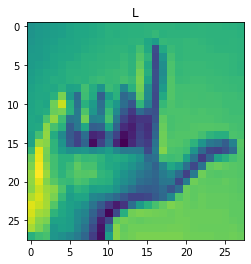

In [129]:
#visualize the datasets
i = 73
plt.imshow(trainset[i][:,:,0])
plt.title(trainlabel[i])

## Create a wider range of training samples

With the ImageDataGenerator, we can create make a number of adjustments to the training images without actually editing the images on disk. Here we can create a wider variety of possible samples by adjusting the rotation, zoom, and even mimic images using the left hand instead of the right.

In [130]:
from keras.preprocessing.image import ImageDataGenerator
traingen=ImageDataGenerator(rotation_range=20,
                            zoom_range=0.1,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.1,
                            horizontal_flip=True,
                            rescale=1/255.0,#normalising the data
                            validation_split=0.2 #train_val split
                            )
traindata_generator = traingen.flow(trainset,train_y,subset='training')
validationdata_generator = traingen.flow(trainset,train_y,subset='validation')

testgen=ImageDataGenerator(rescale=1/255.0)
testdata_generator = testgen.flow(testset,test_y)

## Set up model

Here I set up a relatively simple neural network based on the LeNet-5 model, as follows: 

1. Convolve the image
    - 5x5 kernel 
    - 6 features
    - reLu activation
2. 2d Pooling
    - 2x2 window
3. Convolve 
    - 5x5 kernel
    - 16 features
    - reLu activation
4. 2D Pooling
    - 2x2 window
5. Connected Layer
    - Flatten, Dense

In [131]:
#construct basic model
model=Sequential([])

#layer1
model.add(Conv2D(6, (5,5), activation='relu', input_shape=(28,28,1)))

#layer2
model.add(MaxPooling2D(2,2))

#layer3
model.add(Conv2D(16, (5,5), activation='relu'))

#layer4
model.add(MaxPooling2D(2,2))

#layer5
model.add(Flatten())

#layer5
model.add(Dense(120, activation= 'relu'))
model.add(Dense(26, activation ='softmax'))

In [132]:
#compile and train
epoch_num = 100
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = History()

#model.fit(trainset, train_y, epochs=10, batch_size=256, 
#          validation_split=0.3, callbacks=[history], verbose=1, shuffle=True)

model.fit(traindata_generator, epochs=epoch_num,
         validation_data=validationdata_generator, callbacks=[history], verbose=1, shuffle=True)

Epoch 1/100
687/687 [==============================] - 23s 33ms/step - loss: 2.4826 - accuracy: 0.2376 - val_loss: 1.9778 - val_accuracy: 0.3823
Epoch 2/100
687/687 [==============================] - 21s 31ms/step - loss: 1.6789 - accuracy: 0.4658 - val_loss: 0.8310 - val_accuracy: 0.5318
Epoch 3/100
687/687 [==============================] - 23s 33ms/step - loss: 1.2924 - accuracy: 0.5866 - val_loss: 1.2231 - val_accuracy: 0.5886
Epoch 4/100
687/687 [==============================] - 24s 34ms/step - loss: 1.0441 - accuracy: 0.6538 - val_loss: 1.2330 - val_accuracy: 0.7044
Epoch 5/100
687/687 [==============================] - 21s 30ms/step - loss: 0.8861 - accuracy: 0.7058 - val_loss: 1.0157 - val_accuracy: 0.7181
Epoch 6/100
687/687 [==============================] - 20s 28ms/step - loss: 0.7758 - accuracy: 0.7382 - val_loss: 1.2439 - val_accuracy: 0.7662
Epoch 7/100
687/687 [==============================] - 19s 27ms/step - loss: 0.6967 - accuracy: 0.7650 - val_loss: 0.8631 - val_ac

687/687 [==============================] - 18s 26ms/step - loss: 0.1169 - accuracy: 0.9612 - val_loss: 0.3275 - val_accuracy: 0.9572
Epoch 58/100
687/687 [==============================] - 20s 29ms/step - loss: 0.1098 - accuracy: 0.9645 - val_loss: 0.1063 - val_accuracy: 0.9618
Epoch 59/100
687/687 [==============================] - 19s 28ms/step - loss: 0.1146 - accuracy: 0.9627 - val_loss: 0.0454 - val_accuracy: 0.9667
Epoch 60/100
687/687 [==============================] - 21s 31ms/step - loss: 0.1171 - accuracy: 0.9633 - val_loss: 0.0237 - val_accuracy: 0.9594
Epoch 61/100
687/687 [==============================] - 20s 29ms/step - loss: 0.1115 - accuracy: 0.9620 - val_loss: 0.0189 - val_accuracy: 0.9588
Epoch 62/100
687/687 [==============================] - 18s 26ms/step - loss: 0.1131 - accuracy: 0.9638 - val_loss: 0.0084 - val_accuracy: 0.9594
Epoch 63/100
687/687 [==============================] - 17s 25ms/step - loss: 0.1026 - accuracy: 0.9663 - val_loss: 0.0641 - val_accuracy

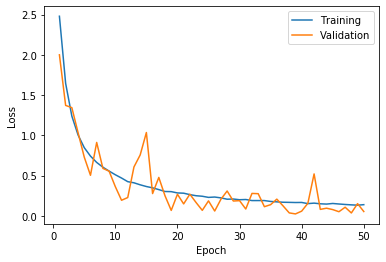

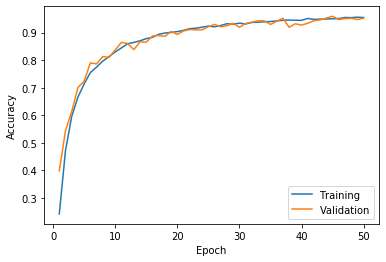

In [100]:
plt.plot(np.arange(1, epoch_num+1), history.history['loss'], label = 'Training')
plt.plot(np.arange(1, epoch_num+1), history.history['val_loss'], label = 'Validation')
plt.legend()
#plt.yscale('log')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

plt.plot(np.arange(1, epoch_num+1), history.history['accuracy'], label = 'Training')
plt.plot(np.arange(1, epoch_num+1), history.history['val_accuracy'], label = 'Validation')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [102]:
# Score trained model.
scores = model.evaluate(testdata_generator, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

225/225 [==============================] - 2s 7ms/step
Test loss: 0.024344980716705322
Test accuracy: 0.9650027751922607


In [114]:
# Score trained model.
scores = model.evaluate(testset, test_y, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

7172/7172 [==============================] - 1s 127us/step
Test loss: 188.19556515082525
Test accuracy: 0.7946179509162903


## Save Model

In [120]:
model_name = 'leNet_NN.h5'
model_path = './models/'
model.save(model_path+model_name, include_optimizer=False)
print('Saved model at '+model_path+model_name)

Saved model at ./models/leNet_NN.h5


### Load saved model

In [123]:
from keras.models import load_model
model_load = load_model(model_path+model_name)
model_load.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

## Test Prediction from Model

In [124]:
classes = model_load.predict(testset)
predictions = np.argmax(classes, axis=1)
predictlabels = le.inverse_transform(predictions)

Text(0.5, 1.0, 'F   (F)')

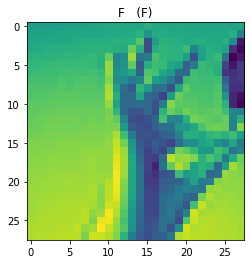

In [125]:
#visualize the test
i = np.random.choice(testset.shape[0], 1)[0]
plt.imshow(testset[i][:,:,0])
plt.title(predictlabels[i]+'   ('+testlabel[i]+')')